In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import logm, expm

# Exercise

## From velocity to strain-rate

Imagine zone of deformation with width $d=100$km, with left side fixed and right side moving with velocity $v=1$cm/year. What is the strain-rate $\dot{\varepsilon}_x$ in horizontal direction?
You already know that strain-rate could be calculated from stretch and time:

$$\dot{\varepsilon}_x = \frac{\ln(S_x)}{t} = \frac{\ln\left(\frac{d + vt}{d}\right)}{t}$$

Can you find equation, which allows us to calculate strain-rate $\dot{\varepsilon}_x$ from width and velocity?

*Hint*: try to calculate limit of above equation for $t\to 0$

$$\lim_{t\to0}{\dot\varepsilon}_x = \lim_{t\to0}\frac{\ln(S_x)}{t} = \lim_{t\to0}\frac{\ln\left(\frac{d + vt}{d}\right)}{t} = \lim_{t\to0}\frac{\ln\left(1+\frac{vt}{d}\right)}{\frac{vt}{d}} \centerdot \frac{v}{d}$$

                                                                 where

$$\lim_{t\to0} \frac{vt}{d} = 0 \;\;\;\;\;\;\; and \;\;\;\;\;\;\; \lim_{t\to0}\frac{\ln\left(1+\frac{vt}{d}\right)}{\frac{vt}{d}}=1$$

                                                                 Hence,

$$\lim_{t\to0}{\dot\varepsilon}_x = \frac{v}{d}$$

## Strain-rate decomposition for oblique convergence

Now imagine that direction of movement of the one side of the orogen is defined by angle $\alpha$. Calculate pure shear strain-rate $\dot{\varepsilon}_y$ resulting from y-component of the velocity $v_y$ and simple shear strain-rate $\dot{\gamma}$ resulting from x-component of the velocity $v_x$. We will assume no volume change, i.e. $\dot{\varepsilon}_x = -\dot{\varepsilon}_y$ Based on these values define **velocity gradient tensor** $\mathbf{L}$ and calculate finite strain deformation gradient $\mathbf{F}$ accumulated after 1 Ma (1 million years).

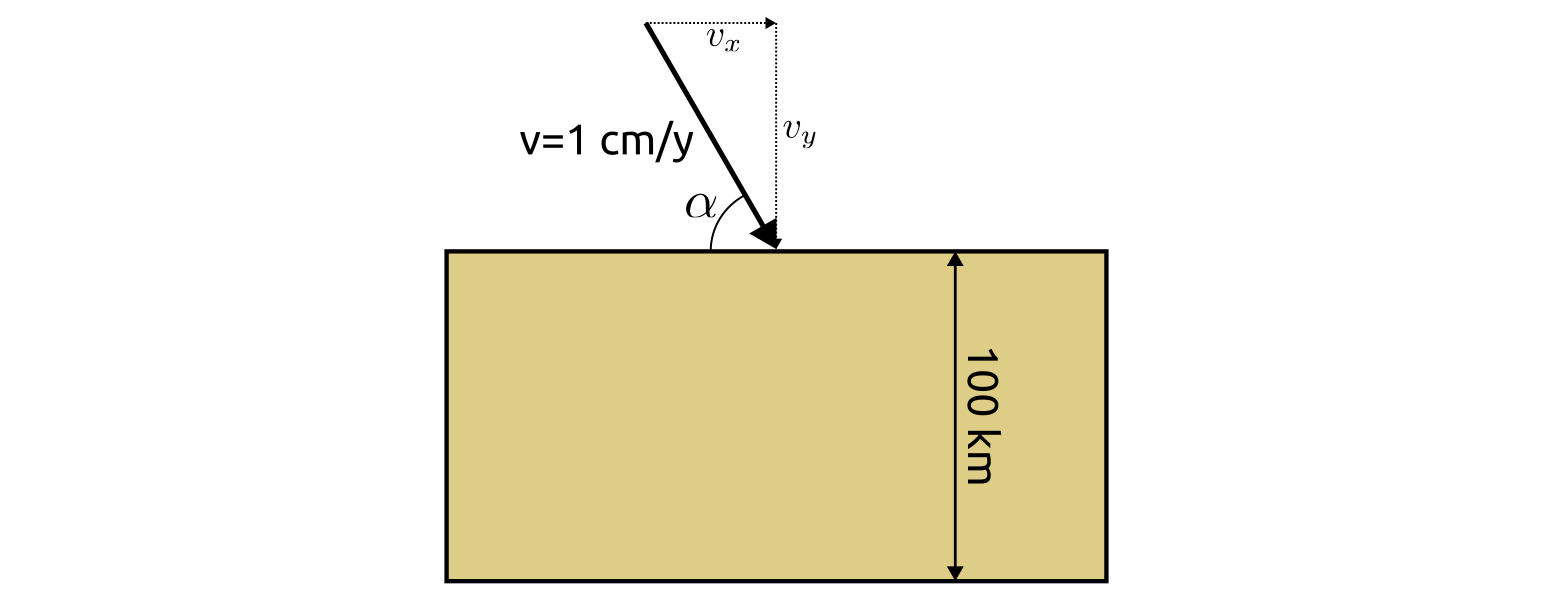

Calculate and plot finite strain intensity (calculated as axial ratio of finite strain ellipse) for angles of convergence from 0° to 90°.

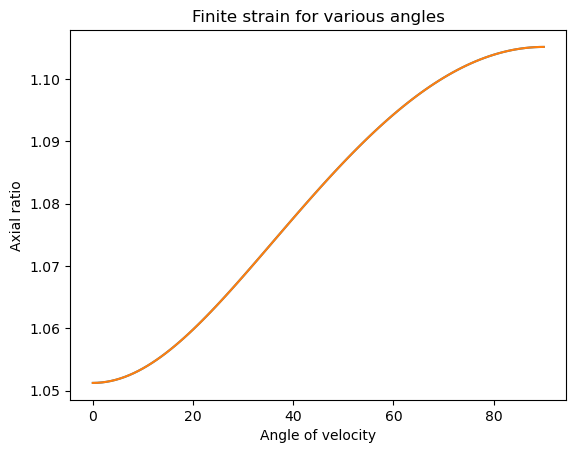

In [6]:
ysec = 365.25 * 24 * 3600              # one year in seconds
v = 0.01/ysec                          # velocity 1cm/year in m/s
d = 100000                             # length of zone in metres
alphas = np.linspace(0, np.pi/2, 100)  # angles of velocity
ars = []                               # axial ratios
for alpha in alphas:
    # Calculate edot and gdot
    vx, vy = v*np.cos(alpha),v*np.sin(alpha)
    edot = vy/d
    gdot = vx/d
    # define velocity gradient
    L = np.array([[edot, gdot], [0, -edot]])
    # calculated deformation gradient after 1Ma
    F = expm(L * 10**6 * ysec)
    evals, evecs = np.linalg.eigh(F @ F.T)
    # calculate axial ratio ar of finite strain ellipse
    ar = np.sqrt(evals[1], evecs[1])
    # [your code here]
    ars.append(ar)

plt.plot(np.degrees(alphas), ars)
plt.xlabel('Angle of velocity')
plt.ylabel('Axial ratio')
plt.title('Finite strain for various angles');